<a href="https://colab.research.google.com/github/samashtiii/fingerprint-spoof-detection/blob/main/major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Importing necessary libraries**

In [3]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
# open source implementation of LBP
from skimage.feature import local_binary_pattern
# data preprocessing and metrics module in scikit-learn
from sklearn import preprocessing, metrics
# SVM implementation in scikit-learn
from sklearn.svm import LinearSVC
import os
import zipfile
import urllib.request
import numpy as np
from PIL import Image, ImageOps
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.svm import LinearSVC
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import cv2
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import glob
import random
import imageio
import PIL, cv2
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image, erosion
from skimage.morphology import square
import matplotlib.image as mpimg
import skimage
import math
from scipy.ndimage import convolve
from PIL import Image,ImageFilter
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from tqdm import tqdm
#from LBP_helper import LocalBinaryPatterns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from imutils import paths

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from skimage import feature
import numpy as np



In [6]:
training_set_fake = os.listdir('/content/drive/MyDrive/dataset/training/Fake')
training_set_live = os.listdir('/content/drive/MyDrive/dataset/training/Live')
testing_set_fake = os.listdir('/content/drive/MyDrive/dataset/testing/Fake')
testing_set_live = os.listdir('/content/drive/MyDrive/dataset/testing/Live')

paths=[]
for i in training_set_fake:
    temp = "/content/drive/MyDrive/dataset/training/Fake/" + str(i)
    paths.append(temp)
for i in training_set_live:
    temp = "/content/drive/MyDrive/dataset/training/Live/" + str(i)
    paths.append(temp)

In [7]:
images = []
for i in paths:
    images.append(cv2.imread(i,0))


**Data Visualization**

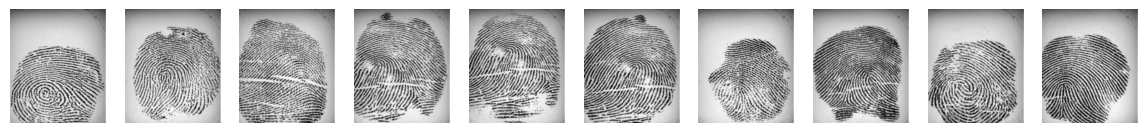

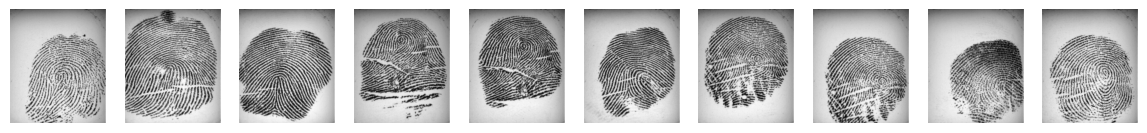

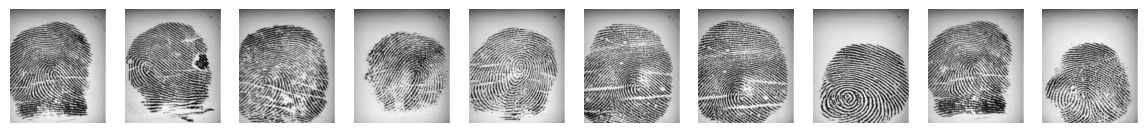

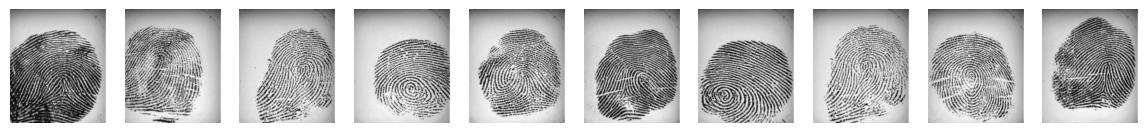

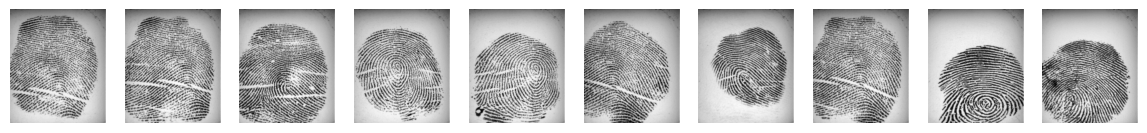

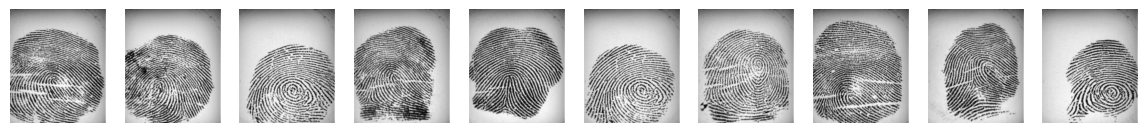

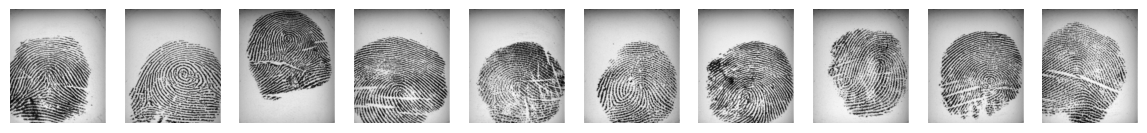

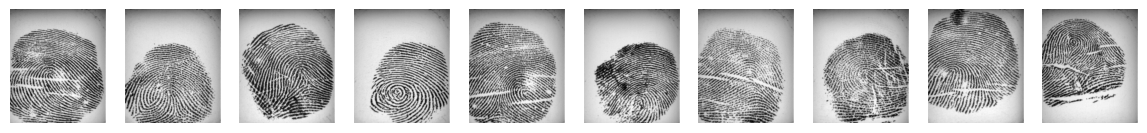

In [8]:
def plot_images(*images):
    images = list(images)
    n = len(images)
    fig, ax = plt.subplots(ncols=n, sharey=True, figsize = (12,12))
    for i, img in enumerate(images):
        ax[i].imshow(img, cmap='gray')
        ax[i].axis('off')
    plt.subplots_adjust(left=0.03, bottom=0.03, right=0.97, top=0.97)
    plt.show()

plot_images(images[0],images[1],images[2],images[3],images[4],images[5],images[6],images[7],images[8],images[9])
plot_images(images[10],images[11],images[12],images[13],images[14],images[15],images[16],images[17],images[18],images[19])
plot_images(images[20],images[21],images[22],images[23],images[24],images[25],images[26],images[27],images[28],images[29])
plot_images(images[30],images[31],images[32],images[33],images[34],images[35],images[36],images[37],images[38],images[39])
plot_images(images[40],images[41],images[42],images[43],images[44],images[45],images[46],images[47],images[48],images[49])
plot_images(images[50],images[51],images[52],images[53],images[54],images[55],images[56],images[57],images[58],images[59])
plot_images(images[60],images[61],images[62],images[63],images[64],images[65],images[66],images[67],images[68],images[69])
plot_images(images[70],images[71],images[72],images[73],images[74],images[75],images[76],images[77],images[78],images[79])

**Image enhancement and preprocessing techniques such as smoothing, thresholding and edge detection are used to make features more prominent in data for extraction to be more accurate**

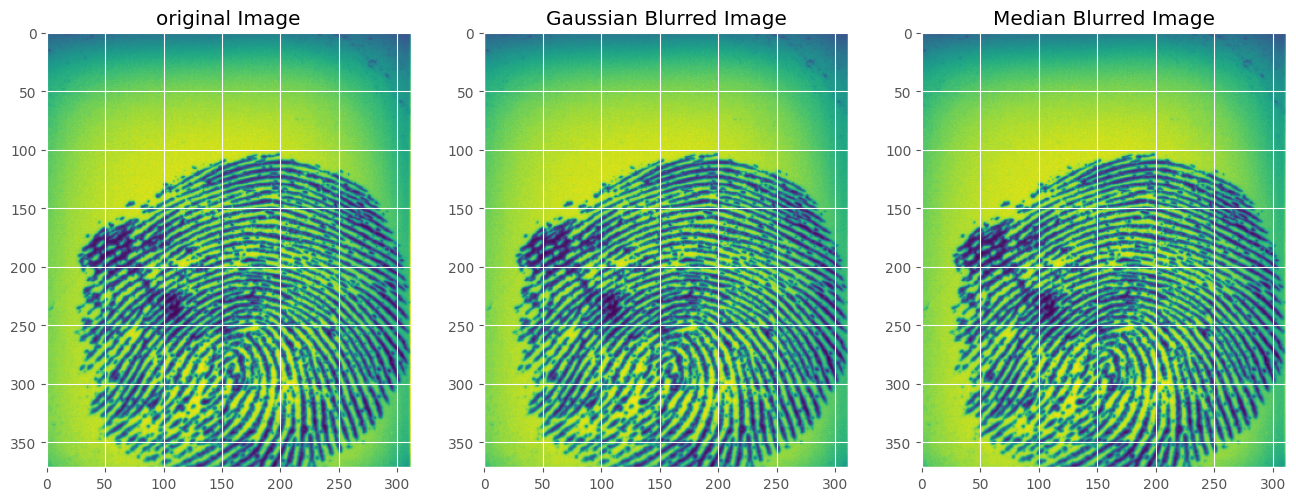

In [9]:
image1 = cv2.imread('/content/drive/MyDrive/dataset/training/Fake/27_8.png',cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/drive/MyDrive/dataset/training/Fake/10_8.png',cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread('/content/drive/MyDrive/dataset/training/Fake/122_10.png',cv2.IMREAD_GRAYSCALE)

gauss_blur = cv2.GaussianBlur(image1,(1,1),0)
median_blur = cv2.medianBlur(image1,1)

fig, axes = plt.subplots(1,3,figsize = (16,16));
axes[0].set_title("original Image");
axes[0].imshow(image1);
axes[1].set_title("Gaussian Blurred Image");
axes[1].imshow(gauss_blur);
axes[2].set_title("Median Blurred Image");
axes[2].imshow(median_blur);

**Histograms**

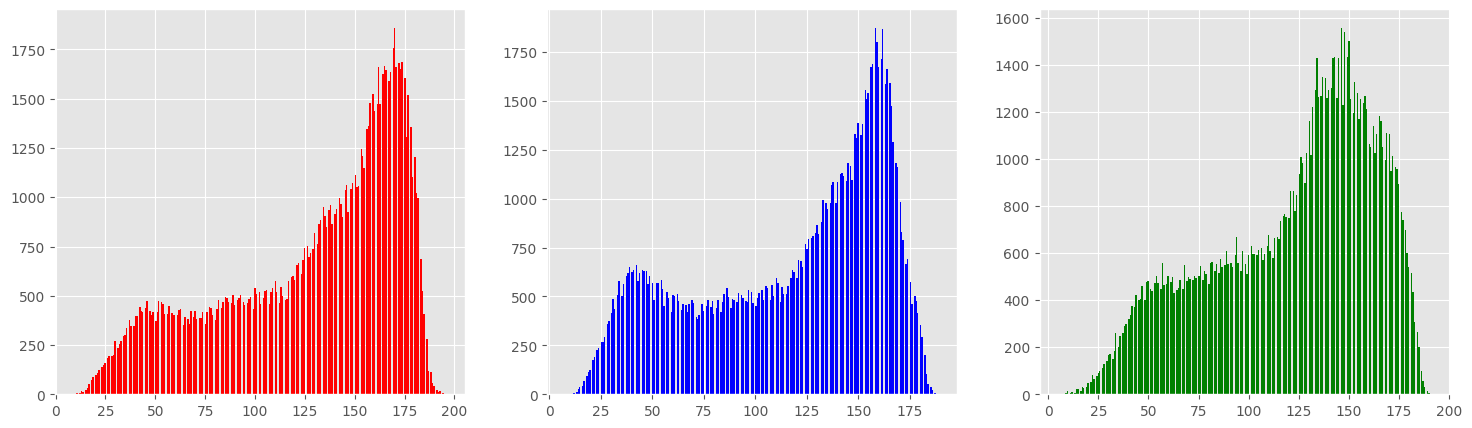

In [10]:
fig, axes = plt.subplots(1,3,figsize = (18,5))
axes[0].hist(image1.ravel(), bins=256, color ="r");
axes[1].hist(image2.ravel(), bins=256, color ="b");
axes[2].hist(image3.ravel(), bins=256, color ="g");

**Data seems to be almost binary - implementing mean and adaptive thresholding**

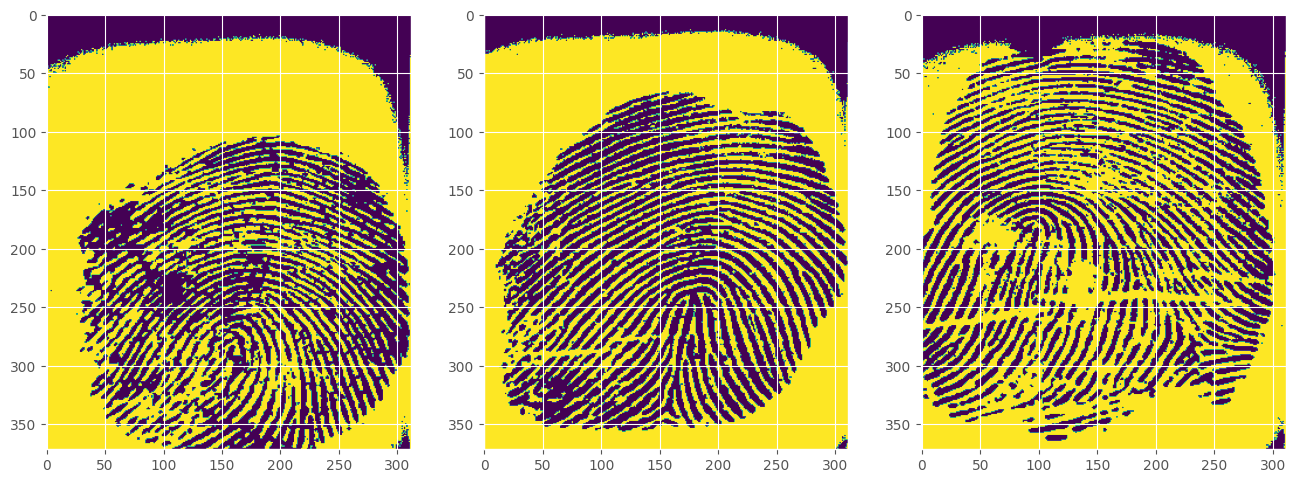

In [11]:
THRESHOLD1 = image1.mean()
THRESHOLD2 = image2.mean()
THRESHOLD3 = image3.mean()

image1 = np.array(image1 > THRESHOLD1).astype(int) * 255
image2 = np.array(image2 > THRESHOLD2).astype(int) * 254
image3 = np.array(image3 > THRESHOLD3).astype(int) * 254

fig, axes = plt.subplots(1,3,figsize = (16,16));
axes[0].imshow(image1);
axes[1].imshow(image2);
axes[2].imshow(image3);

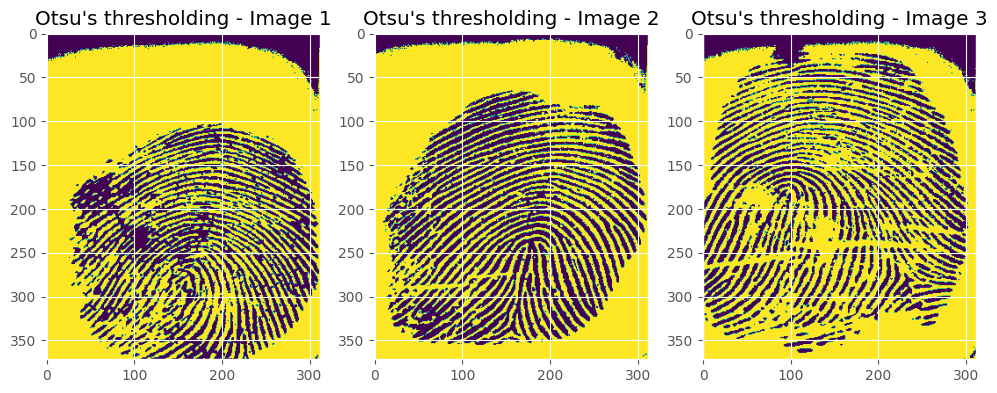

In [12]:
# Adaptive thresholding from OpenCV library - better than Mean Thresholding
img1 = cv2.imread('/content/drive/MyDrive/dataset/training/Fake/27_8.png',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/drive/MyDrive/dataset/training/Fake/10_8.png',cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('/content/drive/MyDrive/dataset/training/Fake/122_10.png',cv2.IMREAD_GRAYSCALE)



# Otsu's thresholding
ret1,th1 = cv2.threshold(img1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret2,th2 = cv2.threshold(img2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret3,th3 = cv2.threshold(img3,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig, axes = plt.subplots(1,3,figsize = (12,12));
axes[0].set_title("Otsu's thresholding - Image 1");
axes[0].imshow(th1);
axes[1].set_title("Otsu's thresholding - Image 2");
axes[1].imshow(th2);
axes[2].set_title("Otsu's thresholding - Image 3");
axes[2].imshow(th3);



**Robert, Sobel, Prewitt Filters**


In [13]:
vertical_robert_filter = np.array([[1,0],[0,-1]])
horizontal_robert_filter = np.array([[0,1],[-1,0]])

vertical_sobel_filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
horizontal_sobel_filter = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

vertical_prewitt_filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
horizontal_prewitt_filter = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

print("vertical robert filter\n",vertical_robert_filter )
print("horizontal robert filter\n",horizontal_robert_filter)
print("vertical sobel filter: \n", vertical_sobel_filter)
print("horizontal sobel filter: \n", horizontal_sobel_filter)

print("vertical prewitt filter: \n", vertical_prewitt_filter)
print("horizontal prewitt filter: \n", horizontal_prewitt_filter)

vertical robert filter
 [[ 1  0]
 [ 0 -1]]
horizontal robert filter
 [[ 0  1]
 [-1  0]]
vertical sobel filter: 
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
horizontal sobel filter: 
 [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
vertical prewitt filter: 
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
horizontal prewitt filter: 
 [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


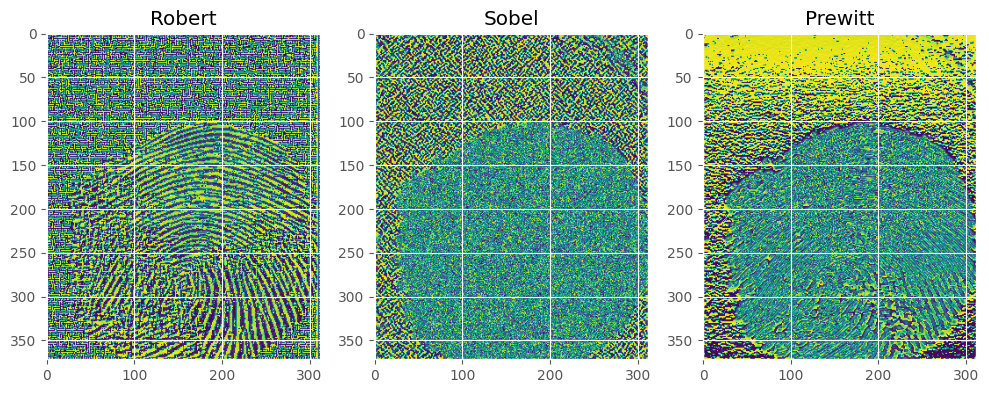

In [14]:
gray_img = Image.fromarray(img1)

convolved_img1 = convolve(gray_img,vertical_robert_filter)
convolved_img1 = convolve(convolved_img1,horizontal_robert_filter)

convolved_img2 = convolve(gray_img,vertical_sobel_filter)
convolved_img2 = convolve(convolved_img2,horizontal_sobel_filter)

convolved_img3 =  convolve(gray_img,vertical_prewitt_filter )
convolved_img3 =  convolve(gray_img,horizontal_prewitt_filter )
fig, axes = plt.subplots(1,3,figsize = (12,12));
axes[0].set_title("Robert");
axes[0].imshow(convolved_img1);
axes[1].set_title("Sobel");
axes[1].imshow(convolved_img2);
axes[2].set_title("Prewitt");
axes[2].imshow(convolved_img3);

**Ridge Detection**

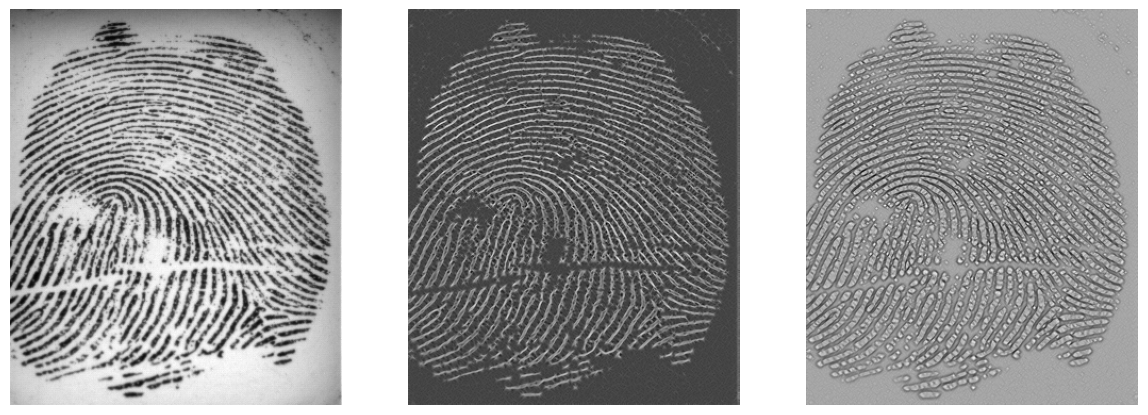

In [15]:
def detect_ridges(gray, sigma= 0.1):
    H_elems = hessian_matrix(gray, sigma=sigma, order='rc')
    maxima_ridges, minima_ridges = hessian_matrix_eigvals(H_elems)
    return maxima_ridges, minima_ridges

def plot_images(*images):
    images = list(images)
    n = len(images)
    fig, ax = plt.subplots(ncols=n, sharey=True, figsize = (12,12))
    for i, img in enumerate(images):
        ax[i].imshow(img, cmap='gray')
        ax[i].axis('off')
    plt.subplots_adjust(left=0.03, bottom=0.03, right=0.97, top=0.97)
    plt.show()

img = cv2.imread('/content/drive/MyDrive/dataset/training/Fake/122_10.png', 0) # 0 imports a grayscale
if img is None:
    raise(ValueError(f"Image didn\'t load. Check that '{'/content/drive/MyDrive/dataset/training/Fake/122_10.png'}' exists."))

a, b = detect_ridges(img, sigma=0.15)

plot_images(img, a, b)


**Termination and Bifurcation detection and Minutiae Extraction**

**The given code extracts features like Termination, Bifurcation and Minutiae from finger prints, the output is shown below the code**

In [16]:
def getTerminationBifurcation(img, mask):
    img = img == 255;
    (rows, cols) = img.shape;
    minutiaeTerm = np.zeros(img.shape);
    minutiaeBif = np.zeros(img.shape);

    for i in range(1,rows-1):
        for j in range(1,cols-1):
            if(img[i][j] == 1):
                block = img[i-1:i+2,j-1:j+2];
                block_val = np.sum(block);
                if(block_val == 2):
                    minutiaeTerm[i,j] = 1;
                elif(block_val == 4):
                    minutiaeBif[i,j] = 1;

    mask = convex_hull_image(mask>0)
    mask = erosion(mask, square(5))
    minutiaeTerm = np.uint8(mask)*minutiaeTerm
    return(minutiaeTerm, minutiaeBif)

In [17]:
class MinutiaeFeature(object):
    def __init__(self, locX, locY, Orientation, Type):
        self.locX = locX;
        self.locY = locY;
        self.Orientation = Orientation;
        self.Type = Type;

def computeAngle(block, minutiaeType):
    angle = 0
    (blkRows, blkCols) = np.shape(block);
    CenterX, CenterY = (blkRows-1)/2, (blkCols-1)/2
    if(minutiaeType.lower() == 'termination'):
        sumVal = 0;
        for i in range(blkRows):
            for j in range(blkCols):
                if((i == 0 or i == blkRows-1 or j == 0 or j == blkCols-1) and block[i][j] != 0):
                    angle = -math.degrees(math.atan2(i-CenterY, j-CenterX))
                    sumVal += 1
                    if(sumVal > 1):
                        angle = float('nan');
        return(angle)
    elif(minutiaeType.lower() == 'bifurcation'):
        (blkRows, blkCols) = np.shape(block);
        CenterX, CenterY = (blkRows - 1) / 2, (blkCols - 1) / 2
        angle = []
        sumVal = 0;
        for i in range(blkRows):
            for j in range(blkCols):
                if ((i == 0 or i == blkRows - 1 or j == 0 or j == blkCols - 1) and block[i][j] != 0):
                    angle.append(-math.degrees(math.atan2(i - CenterY, j - CenterX)))
                    sumVal += 1
        if(sumVal != 3):
            angle = float('nan')
        return(angle)


def extractMinutiaeFeatures(skel, minutiaeTerm, minutiaeBif):
    FeaturesTerm = []

    minutiaeTerm = skimage.measure.label(minutiaeTerm, connectivity=2);
    RP = skimage.measure.regionprops(minutiaeTerm)

    WindowSize = 2
    FeaturesTerm = []
    for i in RP:
        (row, col) = np.int16(np.round(i['Centroid']))
        block = skel[row-WindowSize:row+WindowSize+1, col-WindowSize:col+WindowSize+1]
        angle = computeAngle(block, 'Termination')
        FeaturesTerm.append(MinutiaeFeature(row, col, angle, 'Termination'))

    FeaturesBif = []
    minutiaeBif = skimage.measure.label(minutiaeBif, connectivity=2);
    RP = skimage.measure.regionprops(minutiaeBif)
    WindowSize = 1
    for i in RP:
        (row, col) = np.int16(np.round(i['Centroid']))
        block = skel[row-WindowSize:row+WindowSize+1, col-WindowSize:col+WindowSize+1]
        angle = computeAngle(block, 'Bifurcation')
        FeaturesBif.append(MinutiaeFeature(row, col, angle, 'Bifurcation'))
    return(FeaturesTerm, FeaturesBif)

def ShowResults(skel, TermLabel, BifLabel):
    minutiaeBif = TermLabel * 0;
    minutiaeTerm = BifLabel * 0;

    (rows, cols) = skel.shape
    DispImg = np.zeros((rows, cols, 3), np.uint8)
    DispImg[:, :, 0] = skel;
    DispImg[:, :, 1] = skel;
    DispImg[:, :, 2] = skel;

    RP = skimage.measure.regionprops(BifLabel)
    for idx, i in enumerate(RP):
        (row, col) = np.int16(np.round(i['Centroid']))
        minutiaeBif[row, col] = 1;
        (rr, cc) = skimage.draw.circle_perimeter(row, col, 1);
        skimage.draw.set_color(DispImg, (rr, cc), (255, 0, 0));

    RP = skimage.measure.regionprops(TermLabel)
    for idx, i in enumerate(RP):
        (row, col) = np.int16(np.round(i['Centroid']))
        minutiaeTerm[row, col] = 1;
        (rr, cc) = skimage.draw.circle_perimeter(row, col, 1);
        skimage.draw.set_color(DispImg, (rr, cc), (0, 0, 255));

    plt.figure(figsize=(6,6))
    plt.title("Minutiae extraction results")
    plt.imshow(DispImg)

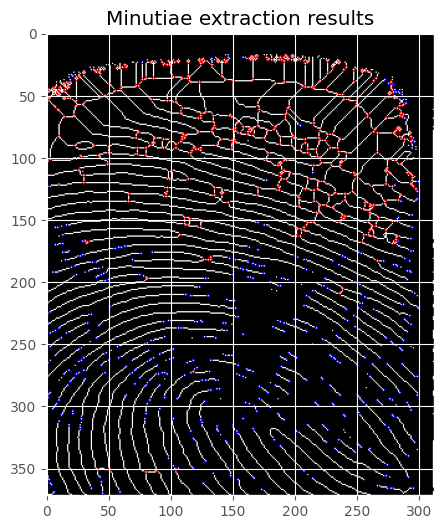

In [18]:
img = cv2.imread('/content/drive/MyDrive/dataset/training/Live/9_2.png',0)
# img = cv2.imread(img_name,0);
img = np.array(img > THRESHOLD1).astype(int)
skel = skimage.morphology.skeletonize(img)
skel = np.uint8(skel)*255;
mask = img*255;

(minutiaeTerm, minutiaeBif) = getTerminationBifurcation(skel, mask);
FeaturesTerm, FeaturesBif = extractMinutiaeFeatures(skel, minutiaeTerm, minutiaeBif)
BifLabel = skimage.measure.label(minutiaeBif, connectivity=1);
TermLabel = skimage.measure.label(minutiaeTerm, connectivity=1);
ShowResults(skel, TermLabel, BifLabel)


**Extracting LBP features From the Image dataset**

In [19]:
from skimage import feature
import numpy as np

class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):

    # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius

    def describe(self, image, eps=1e-7):

        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns

        lbp = feature.local_binary_pattern(image, self.numPoints, self.radius, method="uniform")
        (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, self.numPoints + 3), range=(0, self.numPoints + 2))

        # normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)

        # return the histogram of Local Binary Patterns
        return hist

In [20]:
desc = LocalBinaryPatterns(24, 8)
training_data = []
training_labels = []

testing_data = []
testing_labels = []

pridicted_label_set=[]

In [21]:
paths_all=[]
data_all=[]
for i in training_set_fake:
    temp = "/content/drive/MyDrive/dataset/training/Fake/" + str(i)
    paths_all.append(temp)
for i in training_set_live:
    temp = "/content/drive/MyDrive/dataset/training/Live/" + str(i)
    paths_all.append(temp)

for i in testing_set_fake:
    temp = "/content/drive/MyDrive/dataset/testing/Fake/" + str(i)
    paths_all.append(temp)
for i in testing_set_live:
    temp = "/content/drive/MyDrive/dataset/testing/Live/" + str(i)
    paths_all.append(temp)

labels_all=[]
for imagePath in paths_all:
    # load the image, convert it to grayscale, and describe it
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
    # extract the label from the image path, then update the
    # label and data lists
    labels_all.append(imagePath.split(os.path.sep)[-2])
    data_all.append(hist)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.2, shuffle=True)

[link text](https://)**Applying  SVM model on LBP features**

In [23]:
grid_search = GridSearchCV(SVC(kernel='rbf'),
                           param_grid={'C': [10, 100, 1000, 10000, 100000], 'gamma': [100, 10, 1, 0.1, 0.01, .0001]},
                           cv=5, verbose=True)
grid_search.fit(x_train, y_train)
params = grid_search.best_params_
print("Best parameter: ", params)

model = SVC(kernel='rbf', C=params['C'], gamma=params['gamma'], probability=True,verbose=True)
model.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameter:  {'C': 10000, 'gamma': 100}
[LibSVM]

SVC(C=10000, gamma=100, probability=True, verbose=True)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
model.score(x_test, y_test)
print(model.predict(x_test[1].reshape(1, -1)))
print(model.predict_proba(x_test[1].reshape(1, -1)))
y_pred=model.predict(x_test)
#print(classification_report(y_test, y_pred))
print("Test accuracy: ", model.score(x_test, y_test))
print("train accuracy: ", model.score(x_train, y_train))
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
recall=np.mean(recall)
precision=np.mean(precision)
print(precision)
print(recall)

['Live']
[[0.0656407 0.9343593]]
Test accuracy:  0.9085365853658537
train accuracy:  0.9892802450229708
[[79  4]
 [11 70]]
0.9118618618618619
0.90800237988993


**Applying KNN binary classification**

In [25]:
#Applying KNN binary classification
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
recall=np.mean(recall)
precision=np.mean(precision)
print(precision)
print(recall)

Accuracy: 0.9207317073170732
[[81  2]
 [11 70]]
0.9263285024154589
0.9200505726610144


**Applying NaiveBayes**


In [28]:
#using naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
recall=np.mean(recall)
precision=np.mean(precision)
print(precision)
print(recall)

Accuracy: 0.7560975609756098
[[74  9]
 [31 50]]
0.7761097659402745
0.7544251078387625


**Appliying Decision Tree**

In [29]:
#decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


model = DecisionTreeClassifier()

# Train the model
model.fit(x_train, y_train)

# Evaluate the model
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
recall=np.mean(recall)
precision=np.mean(precision)
print(precision)
print(recall)

Accuracy: 0.8353658536585366
[[69 14]
 [13 68]]
0.8353658536585366
0.8354157370221627


**Applying LogisticRegression model**

In [30]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Create the logistic regression classifier model
model = LogisticRegression(solver='liblinear', random_state=0)

# Train the model
model.fit(x_train, y_train)

# Evaluate the model
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
recall=np.mean(recall)
precision=np.mean(precision)
print(precision)
print(recall)


Accuracy: 0.9085365853658537
[[78  5]
 [10 71]]
0.9102870813397129
0.9081511230105608


**Applying CNN deep learning model**

In [31]:
import os

import joblib

train_path = '/content/drive/MyDrive/dataset/training'
test_path = '/content/drive/MyDrive/dataset/testing'

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale=1. / 255)
train_set = train_data.flow_from_directory(directory=train_path, target_size=(128, 128), batch_size=32,
                                           color_mode="rgb", class_mode='binary')

test_data = ImageDataGenerator(rescale=1. / 255)
test_set = train_data.flow_from_directory(directory=test_path, target_size=(128, 128), batch_size=32, color_mode="rgb",
                                          class_mode='binary')

Found 417 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()

# first layer
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# second layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# flattern layer
model.add(Flatten())

# Dense layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_history = model.fit(train_set, validation_data=test_set, epochs=10)

Epoch 1/10
14/14 [==============================] - 19s 560ms/step - loss: 1.3913 - accuracy: 0.5108 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/10
14/14 [==============================] - 4s 322ms/step - loss: 0.6670 - accuracy: 0.5276 - val_loss: 0.6313 - val_accuracy: 0.8025
Epoch 3/10
14/14 [==============================] - 4s 320ms/step - loss: 0.5839 - accuracy: 0.7530 - val_loss: 0.5040 - val_accuracy: 0.8000
Epoch 4/10
14/14 [==============================] - 6s 417ms/step - loss: 0.6114 - accuracy: 0.7146 - val_loss: 0.7338 - val_accuracy: 0.6075
Epoch 5/10
14/14 [==============================] - 4s 318ms/step - loss: 0.4438 - accuracy: 0.8201 - val_loss: 0.3949 - val_accuracy: 0.8400
Epoch 6/10
14/14 [==============================] - 8s 582ms/step - loss: 0.4271 - accuracy: 0.8106 - val_loss: 0.5759 - val_accuracy: 0.7200
Epoch 7/10
14/14 [==============================] - 4s 318ms/step - loss: 0.3440 - accuracy: 0.8681 - val_loss: 0.4607 - val_accuracy: 0.7950
Epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


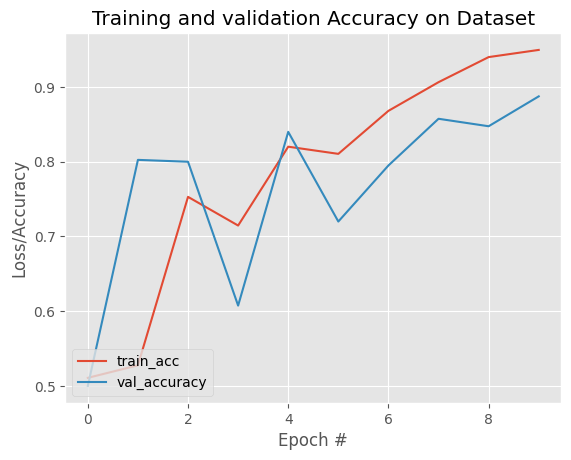

In [33]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, 10), model_history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), model_history.history["val_accuracy"], label="val_accuracy")

plt.title("Training and validation Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
model.save(os.path.join("./model/", "CNN_classification.h5"))

**Checking Image**

In [34]:
# check image
import numpy as np
from tensorflow.keras.preprocessing import image
import tensorflow as tf

model = tf.keras.models.load_model('/content/model/CNN_classification.h5')
test_image = image.load_img('/content/drive/MyDrive/dataset/testing/Live/9_2.png', target_size=(128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
# train_set.class_indices
if result[0][0] == 1:
    prediction = 'Live'
else:
    prediction = 'Fake'
print(prediction)

1/1 [==============================] - 0s 87ms/step
Live


In [35]:
model.load_weights("/content/model/CNN_classification.h5")
test_image = image.load_img('/content/drive/MyDrive/dataset/mythumb.jpeg', target_size=(128, 128))
test_image = image.img_to_array(test_image)
prediction = model.predict(np.expand_dims(test_image, axis=0))[0]
scores = [1 - prediction[0], prediction[0]]

class_names = ["Fake", "Live"]
for score, name in zip(scores, class_names):
    print(
        "This model is %.2f percent confident that fingerprint is %s"
        % ((100 * score), name)
    )

1/1 [==============================] - 0s 20ms/step
This model is 0.00 percent confident that fingerprint is Fake
This model is 100.00 percent confident that fingerprint is Live
